In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

In [35]:
# All methods
def get_top_ngrams(texts, n=2, top_k=10):
    ngram_list = []
    for text in texts:
        tokens = text.split()
        ngram_list.extend(list(ngrams(tokens, n)))

    ngram_counts = Counter(ngram_list)
    return ngram_counts.most_common(top_k)


In [3]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,cleaned_review
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… trip verified | flew on turkish airlines i...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,trip verified | flew on turkish airlines iad-...
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… trip verified | basel to cape town via ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,trip verified | basel to cape town via istanb...
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,not verified | abu dhabi to luxembourg via ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,not verified | abu dhabi to luxembourg via ist...
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… trip verified | the experience with turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,trip verified | the experience with turkish a...
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… trip verified | houston to kiev via istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,trip verified | houston to kiev via istanbul....


<h2>EDA</h2>

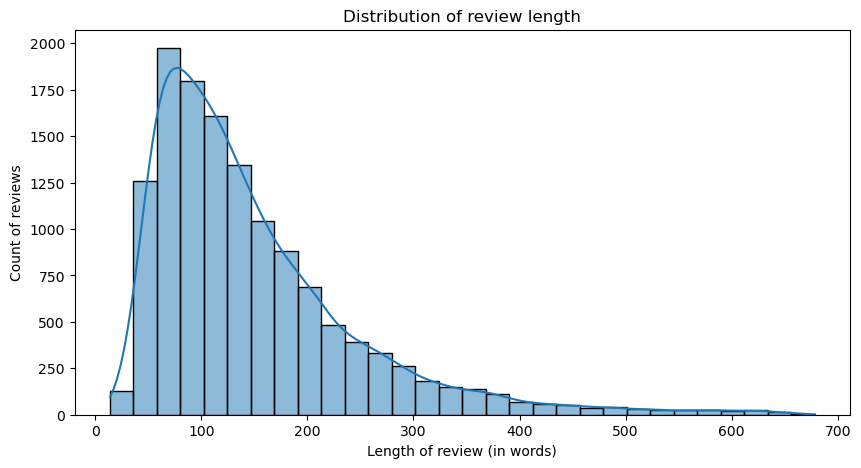

In [5]:
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.xlabel("Length of review (in words)")
plt.ylabel("Count of reviews")
plt.title("Distribution of review length")
plt.show()

In [43]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

extra_stopwords = {'|', '-', 'verified', 'review', 'via', 'flight.', 'flight'}
all_stopwords = stop_words.union(extra_stopwords)

filtered_words = [word for word in words if word not in all_stopwords]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bekezhanissabek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


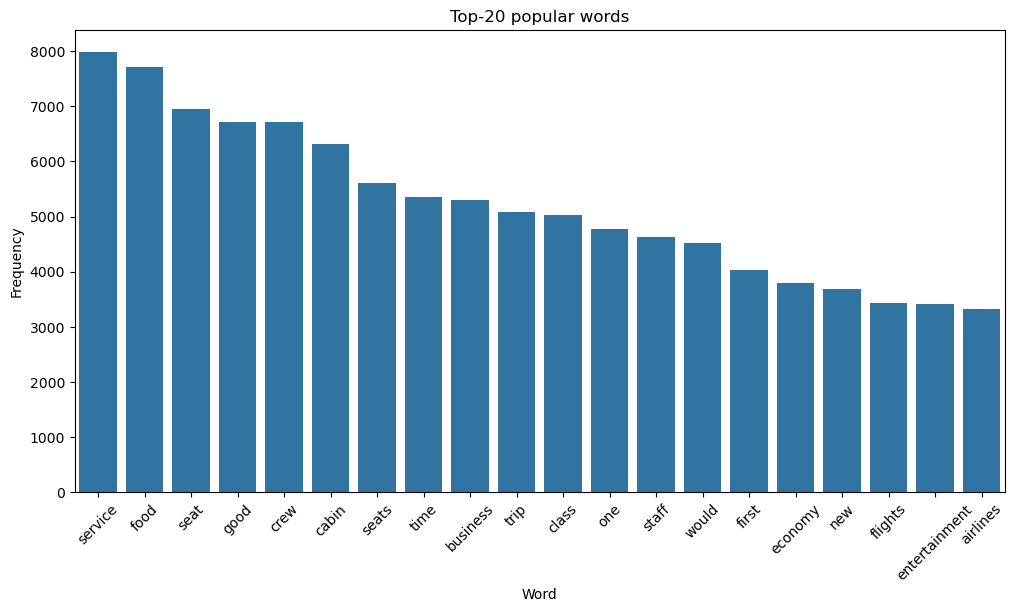

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top-20 popular words")
plt.show()

In [40]:
# Top 10 bigrams
top_bigrams = get_top_ngrams(df['cleaned_review'], n=2)
print("Top 10 bigrams:", top_bigrams)

print("--------------------------------------------------------------------------")

# Top 10 trigrams
top_trigrams = get_top_ngrams(df['cleaned_review'], n=3)
print("Top 10 trigrams:", top_trigrams)


Top 10 bigrams: [(('on', 'the'), 6605), (('of', 'the'), 6285), (('the', 'flight'), 5400), (('and', 'the'), 5259), (('in', 'the'), 5227), (('i', 'was'), 4553), (('verified', 'review'), 4541), (('review', '|'), 4539), (('it', 'was'), 4346), (('to', 'the'), 4344)]
--------------------------------------------------------------------------
Top 10 trigrams: [(('verified', 'review', '|'), 4539), (('trip', 'verified', '|'), 3778), (('the', 'food', 'was'), 1205), (('the', 'flight', 'was'), 1204), (('the', 'cabin', 'crew'), 1199), (('one', 'of', 'the'), 934), (('it', 'was', 'a'), 924), (('the', 'flight', 'attendants'), 686), (('cabin', 'crew', 'were'), 684), (('i', 'had', 'to'), 662)]


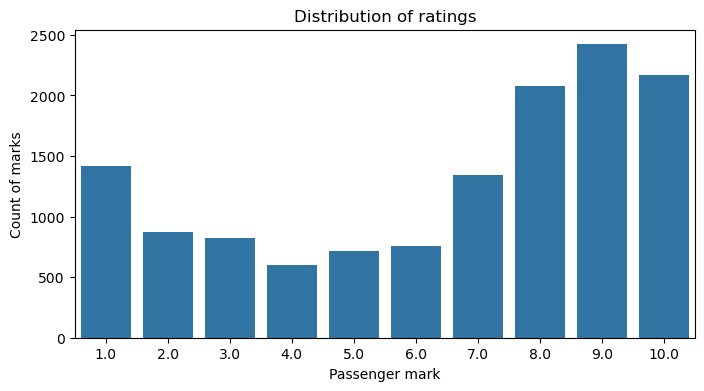

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['overall'])
plt.xlabel("Passenger mark")
plt.ylabel("Count of marks")
plt.title("Distribution of ratings")
plt.show()